## Training Results

Below are some graphs to show the results from training the DQN and DDQN.

First I load the training results and then define the variables and methods I'll use to show the data.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
%matplotlib inline

In [24]:
ddpg_scores = np.load('ddpg_results_0120.npy')

In [25]:
ddpg_last_10_scores = deque(maxlen=10)
ddpg_mean_10_scores = []
for i, score in enumerate(ddpg_scores):
    ddpg_last_10_scores.append(score)
    ddpg_mean_10_scores.append(np.mean(ddpg_last_10_scores))

In [26]:
ddpg_tot_scores = np.zeros((2, len(ddpg_mean_10_scores)))
ddpg_tot_scores[0, :] = ddpg_scores
ddpg_tot_scores[1, :] = ddpg_mean_10_scores
ddpg_max_r = np.max(ddpg_tot_scores, axis=0)
ddpg_min_r = np.min(ddpg_tot_scores, axis=0)
ddpg_mean_r = ddpg_mean_10_scores
ddpg_x = np.arange(len(ddpg_mean_r))

In [27]:
def plot_results(x, max_x, min_x, mean_x, training_agent):
    fig, axs = plt.subplots(1, 1, figsize=(15,10), sharey=False, sharex=True)
    axs.plot(max_x, 'orange', linewidth=1, alpha=0.3)
    axs.plot(min_x, 'orange', linewidth=1, alpha=0.3)
    axs.plot(mean_x, 'b-', label='Moving Average(10 scores)', linewidth=2)
    axs.fill_between(x, min_x, max_x, facecolor='orange', alpha=0.3)
    axs.set_title('{} Scores (Training)'.format(training_agent))
    plt.xlabel('Episodes')
    plt.ylabel('Score')
    axs.legend(loc='upper left')
    plt.show()

### DDPG Training Results

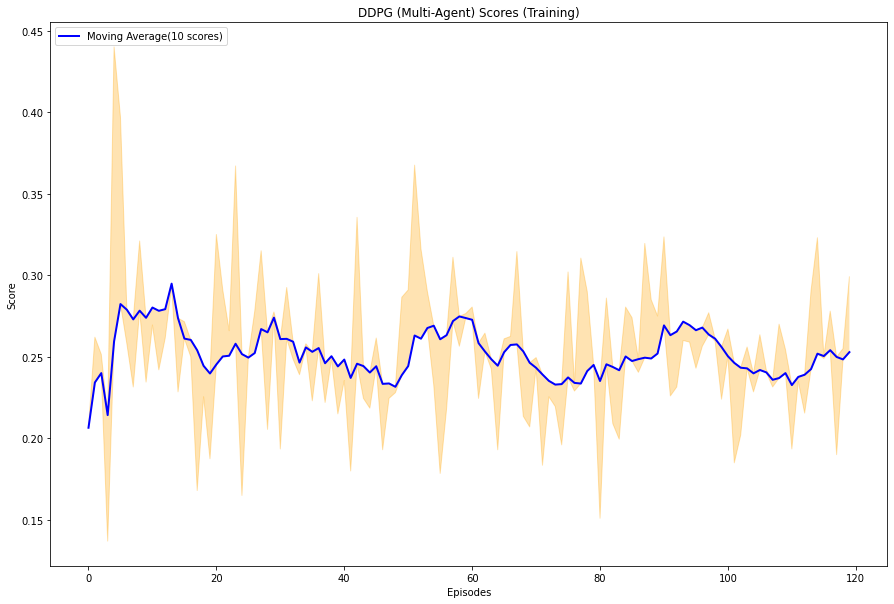

In [28]:
plot_results(ddpg_x, ddpg_max_r, ddpg_min_r, ddpg_mean_r, 'DDPG (Multi-Agent)')

In [29]:
ddpg_times = np.load('ddpg_times_0120.npy')

In [30]:
ddpg_last_10_times = deque(maxlen=10)
ddpg_mean_10_times = []
for i, score in enumerate(ddpg_times):
    ddpg_last_10_times.append(score)
    ddpg_mean_10_times.append(np.mean(ddpg_last_10_times))

In [31]:
ddpg_tot_times = np.zeros((2, len(ddpg_mean_10_times)))
ddpg_tot_times[0, :] = ddpg_times
ddpg_tot_times[1, :] = ddpg_mean_10_times
ddpg_max_r_times = np.max(ddpg_tot_times, axis=0)
ddpg_min_r_times = np.min(ddpg_tot_times, axis=0)
ddpg_mean_r_times = ddpg_mean_10_times
ddpg_x_times = np.arange(len(ddpg_mean_r_times))

In [32]:
def plot_times(x, max_x, min_x, mean_x, training_agent):
    fig, axs = plt.subplots(1, 1, figsize=(15,10), sharey=False, sharex=True)
    axs.plot(max_x, 'orange', linewidth=1, alpha=0.3)
    axs.plot(min_x, 'orange', linewidth=1, alpha=0.3)
    axs.plot(mean_x, 'b-', label='Moving Average(10 times)', linewidth=2)
    axs.fill_between(x, min_x, max_x, facecolor='orange', alpha=0.3)
    axs.set_title('{} Training Times (seconds)'.format(training_agent))
    plt.xlabel('Episodes')
    plt.ylabel('Seconds')
    axs.legend(loc='upper left')
    plt.show()

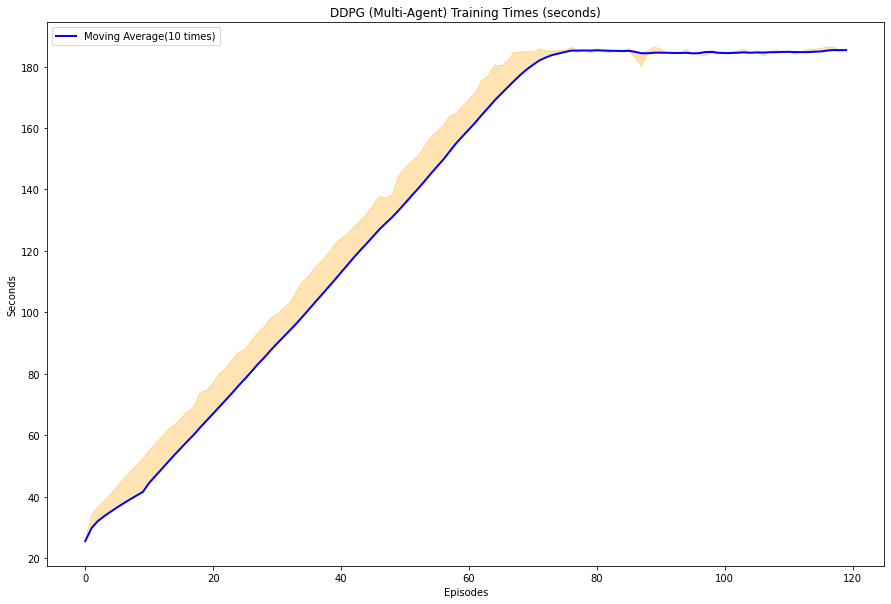

In [33]:
plot_times(ddpg_x_times, ddpg_max_r_times, ddpg_min_r_times, ddpg_mean_r_times, 'DDPG (Multi-Agent)')